## 5.1 Single Neuro Logistric Regression

In this section, we are using the logistic regression method to explore Pima Diabetes dataset. Now the quest is to predict diabetes occurrence based on diagnostic measurements, and logistic regression will be our trusty guide.

### Setting the Stage

First things first, we import the essential Python libraries that will assist us throughout this analysis:

- `matplotlib` and `seaborn` for crafting visually appealing plots,
- `numpy` and `pandas` for data manipulation,
- and a special cameo by `mlxtend` for its ability to plot decision boundaries effortlessly.

We also apply Seaborn's theme to ensure our plots have a consistent and professional look.

### Preparing the Data

Our dataset comes in a CSV file, which we promptly read into a pandas DataFrame. To maintain the integrity of our analysis, we cleanse the dataset by removing any rows where the 'Glucose' or 'BloodPressure' measurements are zero — such values are implausible and would likely skew our insights.

Let's begin by setting up our environment and preparing our dataset for the modeling.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Load the Pima Diabetes dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/diabetes.csv")

# Remove rows where 'Glucose' or 'BloodPressure' are zero
df = df[(df['Glucose'] != 0) & (df['BloodPressure'] != 0)]

### Visual Exploration of the Data

Having cleansed our dataset, we now dive into visual exploration. Our eyes are drawn to patterns, and what better way to discern them than through color-coded scatter plots?

#### Discovering Patterns Through Scatter Plots

We proceed by dividing our dataset into two categories based on the diabetes outcome: one for individuals without diabetes (negative outcome) and another for individuals with diabetes (positive outcome).

With matplotlib's powerful plotting functions, we conjure up two scatter plots side by side:

- The first illustrates the relationship between Glucose levels and Blood Pressure.
- The second reveals how Body Mass Index (BMI) and Age interact.

In these plots, the color blue represents individuals without diabetes, and orange signifies those with the condition. This distinction allows us to visually assess the differences between the two groups and perhaps spot trends that might inform our logistic regression model later on.

Let's visualize the data to uncover any apparent trends and relationships.


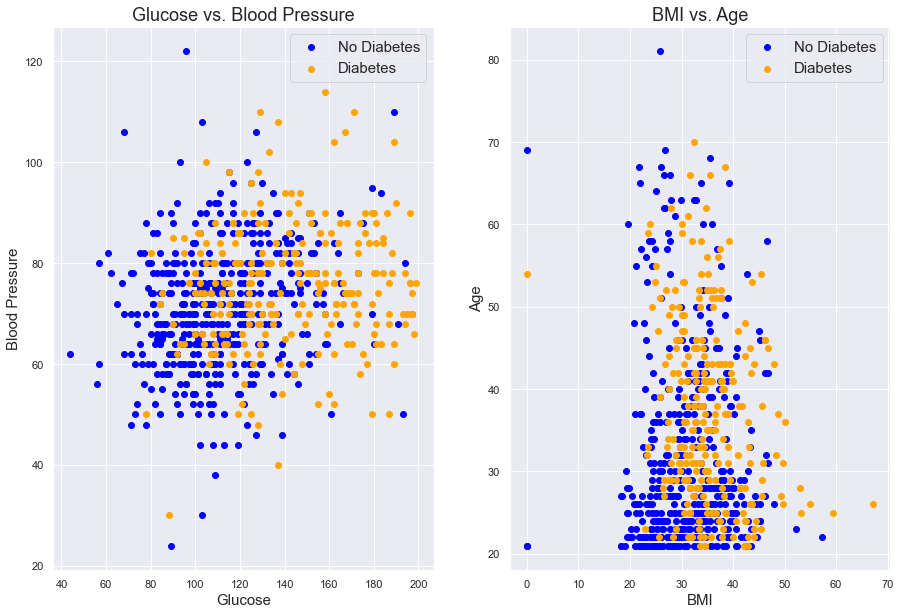

In [2]:
# Define categories based on diabetes outcome
negative = df[df['Outcome'] == 0]
positive = df[df['Outcome'] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Scatter plot for two features: Glucose and BloodPressure
ax1.scatter(negative['Glucose'], 
            negative['BloodPressure'], 
            color = "blue", 
            label = "No Diabetes")
ax1.scatter(positive['Glucose'], 
            positive['BloodPressure'], 
            color = "orange", 
            label = "Diabetes")
ax1.set_xlabel("Glucose", fontsize = 15)
ax1.set_ylabel("Blood Pressure", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.set_title("Glucose vs. Blood Pressure", fontsize = 18)

# Scatter plot for another pair of features: BMI and Age
ax2.scatter(negative['BMI'], 
            negative['Age'], 
            color = "blue", 
            label = "No Diabetes")
ax2.scatter(positive['BMI'], 
            positive['Age'], 
            color = "orange", 
            label = "Diabetes")
ax2.set_xlabel("BMI", fontsize = 15)
ax2.set_ylabel("Age", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper right")
ax2.set_title("BMI vs. Age", fontsize = 18)

plt.show()


### Insights from the Data Visualization

Upon inspecting the scatter plots, we uncover intriguing insights that may serve as a prelude to our logistic regression analysis.

#### Glucose vs. Blood Pressure

The first plot, depicting Glucose versus Blood Pressure, shows a dense cluster where individuals with and without diabetes coalesce. It's noticeable that higher glucose levels are more common in the diabetes group, which aligns with medical understanding. However, there's considerable overlap, especially in the middle range of glucose values, indicating that glucose levels alone may not be a definitive predictor of diabetes.

#### BMI vs. Age

In the second plot, BMI versus Age, we see a spread of data points that suggests a more nuanced relationship. Age does not show a clear pattern with diabetes occurrence, but higher BMI levels appear more frequently amongst those with diabetes. The distribution suggests that while older age might not be a direct indicator, it's potentially a contributing factor combined with high BMI.

#### Overall Observations

Both graphs together underscore the complexity of predicting diabetes. There's no stark separation between the two outcomes, hinting that diabetes is a multifaceted condition influenced by various factors. The overlap between groups in these visual representations suggests that logistic regression, which can consider multiple variables simultaneously, might be well-suited to disentangle these influences and provide a predictive model.

As we transition from raw visualization to model building, these plots serve as a visual hypothesis of what factors might be significant. The real test will come when we apply logistic regression to quantify these relationships.


It seems like from the plotting, it's quite hard to seperate one from the other.

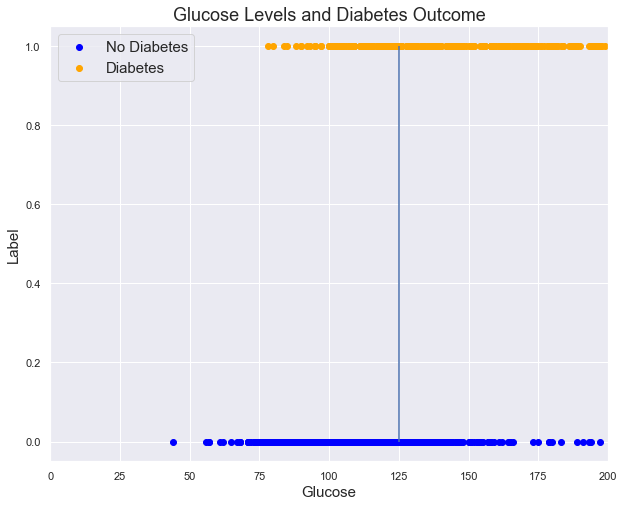

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains the Pima Diabetes dataset
negative = df[df['Outcome'] == 0]
positive = df[df['Outcome'] == 1]

plt.figure(figsize=(10, 8))
plt.xlim((0, 200))  # Adjust the limits to glucose levels observed in the dataset

# Scatter plot for glucose levels with diabetes outcome as labels
plt.scatter(negative['Glucose'], 
            np.zeros(len(negative)),  # Zeros for no diabetes
            color="blue", 
            label="No Diabetes")
plt.scatter(positive['Glucose'], 
            np.ones(len(positive)),  # Ones for diabetes
            color="orange", 
            label="Diabetes")

# Optional: add a vertical line if a threshold is observed in your data
# plt.vlines(threshold_glucose, 0.0, 1.0, color="green", linestyles="--")

plt.xlabel("Glucose", fontsize=15)
plt.ylabel("Label", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("Glucose Levels and Diabetes Outcome", fontsize=18)
plt.vlines(125, 0.0, 1.0)
plt.show()


### Identifying Thresholds in Glucose Levels

Continuing our analysis, we now shift our focus to a scatter plot that specifically examines glucose levels in relation to diabetes outcomes.

#### Glucose Level: A Potential Threshold

We hypothesized that a specific glucose level might serve as a threshold for diabetes risk. To test this theory, we plotted the glucose levels of individuals with and without diabetes, labeling them distinctly. Individuals without diabetes are marked with blue at the bottom, while those with diabetes hover in orange at the top.

A vertical line at 125 mg/dL—close to the medical community's threshold for prediabetes—was drawn to see if it could serve as a decision boundary. However, the plot reveals a more complex reality. Individuals with diabetes are scattered across a wide range of glucose levels, many well below the 125 mg/dL line. Similarly, many without diabetes exhibit glucose levels above this hypothetical threshold.

#### The Complexity of a Cutoff Point

This visualization illustrates the challenge of finding a single cutoff point for diabetes diagnosis based solely on glucose levels. While higher glucose levels are generally associated with diabetes, the overlap is significant. The decision line at 125 mg/dL captures a trend, but it's far from a perfect separator. 

But we are wondering if there is a better way for us to fugure out the probabibity of getting diabete, instead of drawing a cutoff line just by looking at the graph. Here we introduce the Logistic Regression.

### From Cutoffs to Probabilities: Logistic Regression

Our exploration so far has highlighted the limitations of using a single glucose level as a cutoff for predicting diabetes. To enhance our predictive power, we turn to a statistical method that embraces the complexity of human biology: Logistic Regression.

#### Logistic Regression: A Probabilistic Approach

Logistic Regression differs from its linear counterpart in its goal — rather than predicting a continuous outcome, it predicts the probability of a binary outcome. In the context of our Pima Diabetes dataset, it doesn't just assign a "yes" or "no" to diabetes occurrence. Instead, it calculates the likelihood, or probability, of having diabetes based on various factors like glucose levels, BMI, age, and more.

This approach is far more nuanced than a simple threshold. It can take into account the range of glucose levels across individuals, recognizing that the relationship between glucose and diabetes is not a digital switch but a spectrum of risk.

#### Understanding the Sigmoid Function

At the heart of Logistic Regression is the Sigmoid function — the special S-shaped curve that transforms any input into a value between 0 and 1. This is crucial because it allows us to express the output of our logistic regression model as a probability.

Let's visualize the Sigmoid function. You'll notice how it smoothly increases from 0 to 1, which is exactly how we'd like to understand the transition from 'unlikely to have diabetes' to 'likely to have diabetes.'

In the plot of the Sigmoid function, the 'z' on the x-axis represents the combination of our features (like glucose) weighted by their respective importance determined during model training, plus the model's intercept. It's this weighting and adding process that allows Logistic Regression to consider multiple factors at once, something that's much needed given the multifaceted nature of diabetes risk.

Here's a look at the sigmoid function and how it applies to our glucose level data to provide a nuanced, probabilistic understanding of diabetes risk.

The sigmoid activation fuction

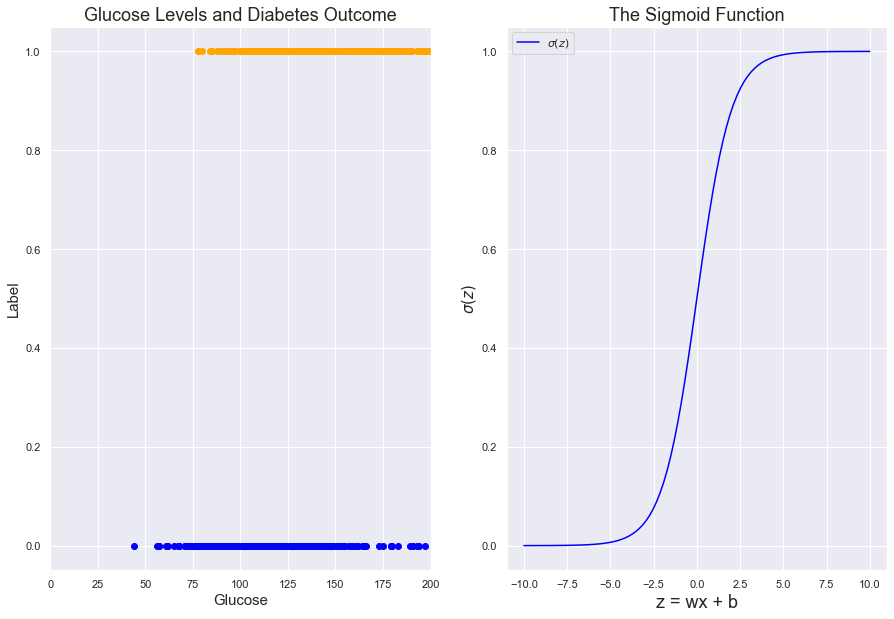

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains the Pima Diabetes dataset
negative = df[df['Outcome'] == 0]
positive = df[df['Outcome'] == 1]

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Adapt the limits to fit glucose levels from the Pima dataset
ax1.set_xlim((0, 200))
ax1.scatter(negative['Glucose'], 
            np.zeros(len(negative)), 
            color="blue", 
            label="No Diabetes")
ax1.scatter(positive['Glucose'], 
            np.ones(len(positive)), 
            color="orange", 
            label="Diabetes")
ax1.set_xlabel("Glucose", fontsize=15)
ax1.set_ylabel("Label", fontsize=15)
ax1.set_title("Glucose Levels and Diabetes Outcome", fontsize=18)

# Plot of the Sigmoid function
domain = np.linspace(-10, 10, 100)  # Adjusted domain to better visualize sigmoid curve
ax2.plot(domain, 
         sigmoid(domain), 
         color="blue", 
         label="$\sigma(z)$")
ax2.set_xlabel("z = wx + b", fontsize=18)
ax2.set_ylabel("$\sigma(z)$", fontsize=15)
ax2.set_title("The Sigmoid Function", fontsize=18)
ax2.legend()

plt.show()


### Probability and Prediction: The Sigmoid in Action

The scatter plot on the left visualizes glucose levels against a binary outcome: 0 for no diabetes and 1 for diabetes. Blue dots represent individuals without diabetes, and the orange line marks the glucose levels of individuals with diabetes. The clear separation between the two suggests a relationship between glucose levels and the likelihood of diabetes, but as we've noted before, a rigid cutoff may not be the best approach.

Enter the sigmoid function, illustrated in the plot on the right. This is the secret sauce that powers logistic regression. Its elegant S-curve translates raw linear predictions (called logits, hence 'logistic' regression) into probabilities between 0 and 1.

#### Understanding the S-Curve

Look closely at the sigmoid plot. At extreme values of `Z` (which is the linear combination of our features), the curve approaches 1 or 0, representing high certainty of the respective outcome. Around the center, where `Z` is close to zero, the probabilities are uncertain and hover around 0.5 — the curve is most sensitive here. This mirrors real life, where extreme values of indicators (like very high glucose) might strongly suggest diabetes, whereas mid-range values require more nuanced interpretation.

#### Applying Sigmoid to Glucose Levels

Now, let's bring back the concept of glucose levels. If we apply the sigmoid function to our logistic regression model for diabetes prediction, we can classify individuals into 'with diabetes' or 'without diabetes' not just based on whether their glucose level crosses a certain threshold, but on the calculated probability. Our logistic regression model will do precisely this, weighting glucose levels along with other factors, to place individuals on this sigmoid curve.

In essence, the sigmoid function is what allows us to move from a world of yes/no, black/white, to a spectrum of probabilities, embracing the complexity and subtlety of medical diagnosis.

As we prepare to build our logistic regression model, these visualizations set the stage for a more flexible, probabilistic approach to predicting diabetes.


We build a SingleNeuron function for logistic regression.

### Training a Single Neuron for Diabetes Prediction

In this section of the code, we prepare and train a single artificial neuron to predict diabetes based on glucose levels. We use the glucose level as the sole input feature and the diabetes outcome (positive or negative) as the binary target variable.

First is our algorithm

In [5]:
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha=0.005, epochs=50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                output = self.predict(xi)
                error = target - output
                self.w_[:-1] += alpha * error * xi
                self.w_[-1] += alpha * error
                errors += self.cost_function(target, output)
            self.errors_.append(errors / N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy(target, output):
        return -(target * np.log(output) + (1 - target) * np.log(1 - output))

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize=(10, 8))
        axs.plot(range(1, len(self.errors_) + 1), self.errors_, label="Cost function")
        axs.set_xlabel("Epochs", fontsize=15)
        axs.set_ylabel("Cost", fontsize=15)
        axs.legend(fontsize=15)
        axs.set_title("Cost Calculated after Each Epoch During Training", fontsize=18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize=(10, 8))
        plot_decision_regions(X, y, clf=self)
        plt.title("Neuron Decision Boundary", fontsize=18)
        plt.xlabel(xstring, fontsize=15)
        plt.ylabel(ystring, fontsize=15)
        plt.show()



#### Data Preparation
- **Input Feature (X)**: We use the 'Glucose' column from the Pima Diabetes dataset. This feature represents the glucose concentration a 2-hour oral glucose tolerance test.
- **Target Variable (y)**: The 'Outcome' column is used as the target variable. It contains binary values where 1 indicates the presence of diabetes and 0 indicates no diabetes.

#### Model Configuration
- **Activation Function**: We utilize the sigmoid function as the activation function. This function maps the neuron's input (a linear combination of the weighted inputs) to a probability between 0 and 1, suitable for binary classification.
- **Loss Function**: The cross-entropy loss function is used to quantify the error between the predicted values and the actual labels. This function is particularly effective for binary classification tasks as it penalizes incorrect classifications more heavily when the predicted probability diverges significantly from the actual label.

#### Training
- **Training Process**: We train the neuron using stochastic gradient descent (SGD). During training, the model iteratively adjusts its weights based on the gradient of the loss function to minimize error. We use a learning rate of `0.01` and train for `5,000` epochs to ensure adequate convergence.
- **Weight Initialization**: The neuron's weights are initially randomized, and biases are set to zero, which are then optimized through the training process.

#### Visualization
- **Cost Function Plot**: After training, we plot the cost function against the number of epochs. This plot helps in visualizing the decrease in training loss over time, indicating successful learning if the plot shows a downward trend.

This model serves as a basic demonstration of logistic regression using a single-layer neural network structure. The simplicity of this model makes it a great starting point for understanding the fundamentals of neural network training in binary classification tasks.


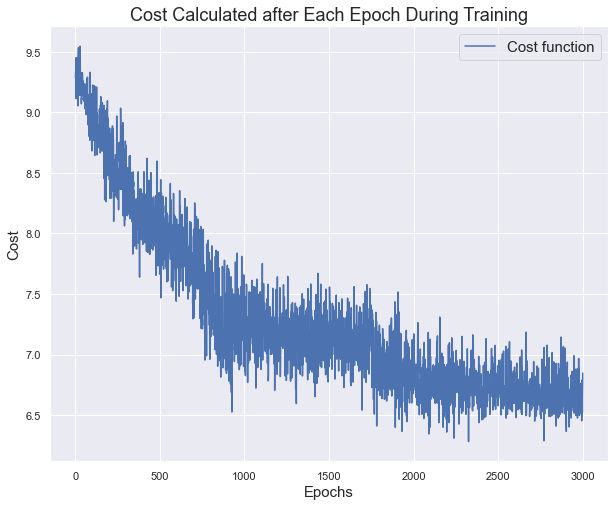

In [6]:
X = df['Glucose'].values
X = X.reshape(-1, 1)  # Reshaping for a single feature
y = df['Outcome'].values  # 'Outcome' should be 0 or 1

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cross-entropy loss function
def cross_entropy_loss(y_hat, y):
    # Prevent division by zero
    y_hat = np.clip(y_hat, 1e-9, 1 - 1e-9)
    return - y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

# Instantiate the neuron
node = SingleNeuron(sigmoid, cross_entropy_loss)

# Train the neuron
node.train(X, y, alpha=0.01, epochs= 3_000)

# Optional: Plot the cost function to check convergence
node.plot_cost_function()

### Visualizing the Logistic Regression Curve

This code snippet is designed to visualize the performance of a trained logistic regression model (implemented as a single neuron). The model predicts the probability of diabetes based on glucose levels from the Pima Diabetes dataset.

#### Visualization Details
- **Data Points**: The scatter plot represents individuals categorized into two groups: those with diabetes and those without. Individuals without diabetes are plotted at a y-value of 0, and those with diabetes at a y-value of 1.
- **Logistic Regression Curve**: The green curve represents the probabilities predicted by the logistic regression model across a range of glucose levels. This curve demonstrates how the likelihood of diabetes increases with glucose levels according to the model.

#### Axes and Labels
- **X-axis** (`Glucose Level`): Represents the glucose levels which are a crucial indicator used for diagnosing diabetes.
- **Y-axis** (`Probability / Label`): Indicates the binary outcome (0 for no diabetes, 1 for diabetes) and the predicted probability of diabetes as output by the model.

#### Interpretation
- The logistic curve is particularly useful for understanding the threshold levels of glucose that significantly increase the likelihood of diabetes according to the model's training. For instance, higher glucose levels where the curve approaches the value 1 indicate a higher probability of diabetes.
- The distinct separation between the two groups along with the logistic curve provides a clear visual illustration of how well the model is performing, highlighting regions where the model is certain or uncertain about the diabetes diagnosis.

This visualization is an effective tool for medical professionals and data scientists to evaluate the effectiveness of predictive models in healthcare diagnostics, specifically for diabetes prediction based on glucose levels.


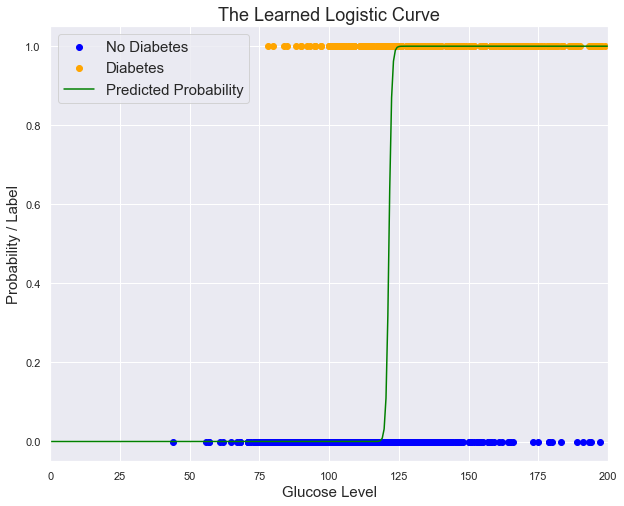

In [7]:
plt.figure(figsize=(10, 8))
plt.xlim((0, 200))  # Adjust the x-axis limits to span the range of glucose levels in the dataset

# Assuming `node` is your trained SingleNeuron model and `df` is your DataFrame
negative = df[df['Outcome'] == 0]
positive = df[df['Outcome'] == 1]

plt.scatter(negative['Glucose'], 
            np.zeros(len(negative)), 
            color="blue", 
            label="No Diabetes")
plt.scatter(positive['Glucose'], 
            np.ones(len(positive)), 
            color="orange", 
            label="Diabetes")

# Plotting the predicted probabilities from the neuron model
domain = np.linspace(0, 200, 300)
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color="green", label="Predicted Probability")

plt.xlabel("Glucose Level", fontsize=15)
plt.ylabel("Probability / Label", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("The Learned Logistic Curve", fontsize=18)
plt.show()


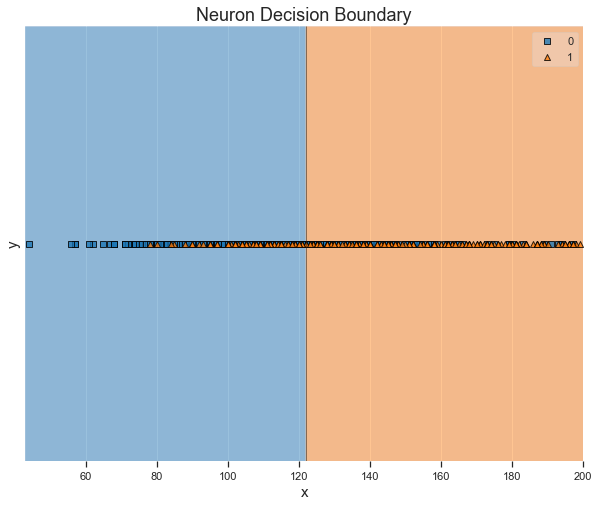

In [8]:
node.plot_decision_boundary(X, y)
plt.show()

So from the graph our initial guessing of 125 is quite far-off by our logistic algorithm.

### Logistic Regression with multiple inputs

We would like to include ```BMI``` as our independent varialble. Thus, we change the input variables to the ones below:

In [9]:
# Assuming df is your DataFrame containing the Pima Diabetes dataset
X_one = df[['Glucose']].values  # One feature
X_two = df[['Glucose', 'BMI']].values  # Two features
y = df['Outcome'].values  # Target variable

In [10]:
# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cross-entropy loss function
def cross_entropy_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-9, 1 - 1e-9)  # Prevent log(0)
    return - y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

# Instantiate the neurons
node_one = SingleNeuron(sigmoid, cross_entropy_loss)
node_two = SingleNeuron(sigmoid, cross_entropy_loss)


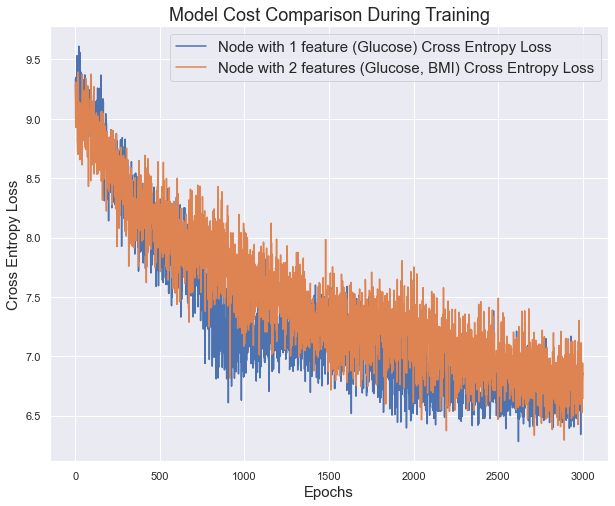

In [11]:
# Train node_one on one feature
node_one.train(X_one, y, alpha=0.01, epochs=3_000)

# Train node_two on two features
node_two.train(X_two, y, alpha=0.01, epochs=3_000)

# Plotting the loss comparison
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(node_one.errors_) + 1), 
         node_one.errors_, 
         label="Node with 1 feature (Glucose) Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_, 
         label="Node with 2 features (Glucose, BMI) Cross Entropy Loss")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Cross Entropy Loss", fontsize=15)
plt.legend(fontsize=15)
plt.title("Model Cost Comparison During Training", fontsize=18)
plt.show()

This looks hedious so I would plot the average to make it look more clear

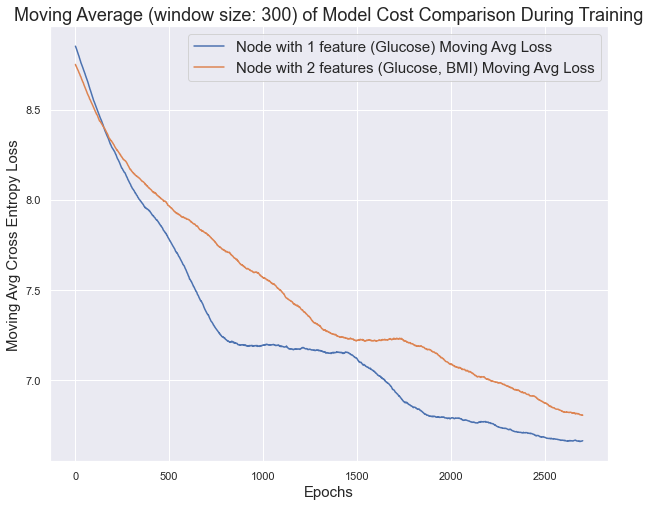

In [12]:
def moving_average(losses, window_size):
    """Calculate the moving average given a window size."""
    cumsum_vec = np.cumsum(np.insert(losses, 0, 0)) 
    return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

# Define the window size for the moving average
window_size = 300  # Adjust this value as needed

# Calculate the moving averages for both nodes
node_one_moving_avg = moving_average(node_one.errors_, window_size)
node_two_moving_avg = moving_average(node_two.errors_, window_size)

# Plotting the loss comparison with moving averages
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(node_one_moving_avg) + 1), 
         node_one_moving_avg, 
         label="Node with 1 feature (Glucose) Moving Avg Loss")
plt.plot(range(1, len(node_two_moving_avg) + 1), 
         node_two_moving_avg, 
         label="Node with 2 features (Glucose, BMI) Moving Avg Loss")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Moving Avg Cross Entropy Loss", fontsize=15)
plt.legend(fontsize=15)
plt.title(f"Moving Average (window size: {window_size}) of Model Cost Comparison During Training", fontsize=18)
plt.show()


Seems like the Loss is higher for the model with two features compared to the model with one feature. 

Then we plot the decision boundary for the model with two features. 

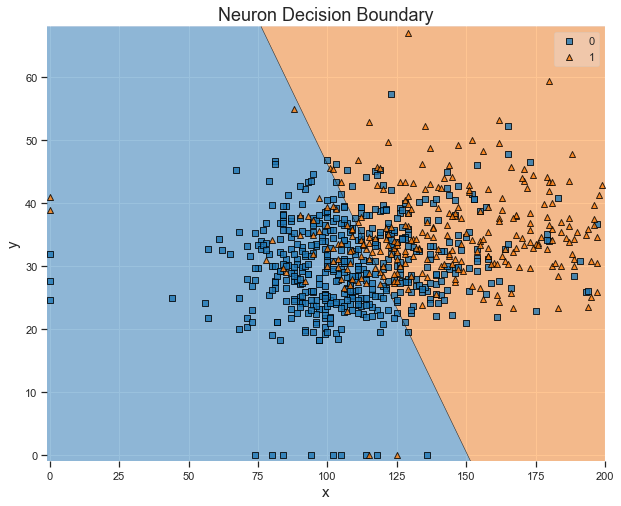

In [24]:
node_two.plot_decision_boundary(X_two, y)